## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
alldata = pd.merge(mouse_metadata,study_results,on="Mouse ID", how="inner")
alldata.sample(10)

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
848      f545    Zoniferol  Female          20          26         35   
670      c402     Stelasyn  Female           1          27          0   
265      d251     Ramicane  Female           8          19         10   
1486     s141     Propriva    Male           8          25          0   
226      r811     Ramicane    Male           9          19          5   
1505     s187     Propriva    Male          22          25         15   
1223     n671    Infubinol    Male          18          25         20   
721      c819     Ketapril    Male          21          25         20   
582      a963     Stelasyn  Female          23          27         20   
945      i386    Infubinol  Female          23          29         20   

      Tumor Volume (mm3)  Metastatic Sites  
848            66.742924                 1  
670            45.000000                 0  
265            42.432258                 1  
1486           45.000000                 0  
226            45.625802                 0  
1505           52.081632                 1  
1223           54.822521                 0  
721            49.762415                 1  
582            51.463734                 0  
945            55.087724                 2

## Summary statistics

In [2]:
#Create groupby based on drug
drug_groupby = alldata.groupby(["Drug Regimen"])
mean_by_drug = drug_groupby.mean()
mean_by_drug

Age_months  Weight (g)  Timepoint  Tumor Volume (mm3)  \
Drug Regimen                                                          
Capomulin      13.456522   19.965217  21.565217           40.675741   
Ceftamin       13.247191   27.398876  19.747191           52.591172   
Infubinol      16.230337   27.196629  18.174157           52.884795   
Ketapril       15.659574   27.861702  19.707447           55.235638   
Naftisol       12.000000   27.166667  19.623656           54.331565   
Placebo        10.734807   27.928177  18.674033           54.033581   
Propriva       10.894410   27.043478  16.863354           52.322552   
Ramicane       10.684211   19.679825  21.425439           40.216745   
Stelasyn       12.784530   27.856354  19.226519           54.233149   
Zoniferol      12.598901   27.692308  19.368132           53.236507   

              Metastatic Sites  
Drug Regimen                    
Capomulin             0.713043  
Ceftamin              1.179775  
Infubinol             0.960674  
Ketapril              1.297872  
Naftisol              1.182796  
Placebo               1.441989  
Propriva              0.975155  
Ramicane              0.548246  
Stelasyn              0.872928  
Zoniferol             1.230769

In [3]:
#Start summary statistics DF for mean tumor volume by drug
summary_stats = pd.DataFrame(mean_by_drug["Tumor Volume (mm3)"])
summary_stats = summary_stats.rename(columns={"Tumor Volume (mm3)":"Mean"})

#Append median tumor volume by drug
median_by_drug = drug_groupby.median()
summary_stats["Median"] = median_by_drug["Tumor Volume (mm3)"]

#Append variance of tumor volume
var_by_drug = drug_groupby.var()
summary_stats["Variance"] = var_by_drug["Tumor Volume (mm3)"]

#Append std deviation
std_dev_by_drug = drug_groupby.std()
summary_stats["Std Deviation"] = std_dev_by_drug["Tumor Volume (mm3)"]

#Append SEM
sem_by_drug = drug_groupby.sem()
summary_stats["Std Error of Mean (SEM)"] = sem_by_drug["Tumor Volume (mm3)"]
summary_stats

Mean     Median   Variance  Std Deviation  \
Drug Regimen                                                   
Capomulin     40.675741  41.557809  24.947764       4.994774   
Ceftamin      52.591172  51.776157  39.290177       6.268188   
Infubinol     52.884795  51.820584  43.128684       6.567243   
Ketapril      55.235638  53.698743  68.553577       8.279709   
Naftisol      54.331565  52.509285  66.173479       8.134708   
Placebo       54.033581  52.288934  61.168083       7.821003   
Propriva      52.322552  50.854632  42.351070       6.507770   
Ramicane      40.216745  40.673236  23.486704       4.846308   
Stelasyn      54.233149  52.431737  59.450562       7.710419   
Zoniferol     53.236507  51.818479  48.533355       6.966589   

              Std Error of Mean (SEM)  
Drug Regimen                           
Capomulin                    0.329346  
Ceftamin                     0.469821  
Infubinol                    0.492236  
Ketapril                     0.603860  
Naftisol                     0.596466  
Placebo                      0.581331  
Propriva                     0.512884  
Ramicane                     0.320955  
Stelasyn                     0.573111  
Zoniferol                    0.516398

## Bar plots

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
# Create series for x-axis and y-axies
drugs = alldata["Drug Regimen"].unique()
drugs.sort()
datapts = drug_groupby.count()
datapts_x = datapts["Sex"]

In [5]:
drugs

array(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol',
       'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype=object)

In [6]:
datapts_x

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Sex, dtype: int64

(array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 <a list of 10 Text xticklabel objects>)

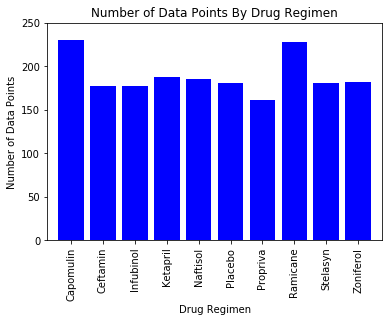

In [7]:
#Set up bar chart
plt.bar(drugs, datapts_x, color="b", align="center")
tick_locations = [value for value in drugs]
plt.xticks(tick_locations,drugs)
plt.xlim(-0.75,len(drugs)-0.25)
plt.ylim(0,max(datapts_x)+20)

#Create labels, rotate x-axis labels, sort drugs alphabetically
plt.title("Number of Data Points By Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.xticks(rotation = 90)

In [8]:
#Clear plot
plt.show()

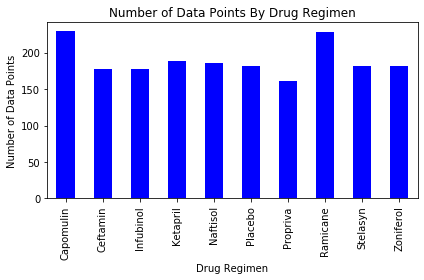

In [9]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
datapts_x.plot(kind="bar", facecolor="blue")

#Create labels, rotate x-axis labels, sort drugs alphabetically
plt.title("Number of Data Points By Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.tight_layout()

## Pie plots

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# Create a groupby based on sex
sex_groupby = alldata.groupby(["Sex"])

# Determine percent of each sex
count_by_sex = sex_groupby.count()/datapts_x.sum()*100
count_by_sex

Mouse ID  Drug Regimen  Age_months  Weight (g)  Timepoint  \
Sex                                                                  
Female  49.392499     49.392499   49.392499   49.392499  49.392499   
Male    50.607501     50.607501   50.607501   50.607501  50.607501   

        Tumor Volume (mm3)  Metastatic Sites  
Sex                                           
Female           49.392499         49.392499  
Male             50.607501         50.607501

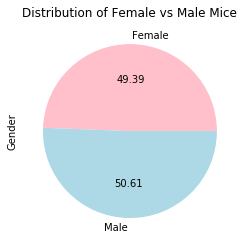

In [11]:
# Create pie plot using Pandas
gender_pie = count_by_sex["Mouse ID"].plot(kind="pie", y={"Female","Male"}, autopct='%.2f',
                                           colors=['pink','lightblue'],title = "Distribution of Female vs Male Mice")
gender_pie.set_ylabel("Gender")
plt.show()

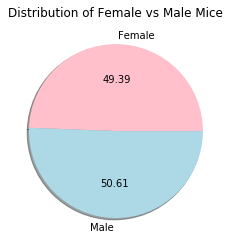

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Save gender counts as series
gender_count = sex_groupby.count()
gender_for_pie = gender_count["Mouse ID"]
gender_for_pie

labels = ["Female", "Male"]
colors = ["pink","lightblue"]
plt.pie(gender_for_pie, labels=labels, colors=colors,autopct="%.2f", shadow=True)
plt.title("Distribution of Female vs Male Mice")
plt.show()

## Quartiles, outliers and boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Create new DF for top 4 regimens
data_top4 = alldata.loc[(alldata["Drug Regimen"]=="Capomulin") | (alldata["Drug Regimen"]=="Ramicane") |
                        (alldata["Drug Regimen"]=="Infubinol") | (alldata["Drug Regimen"]=="Ceftamin"),:]

#Filter DF to only show rows for last timepoint
last_timept = data_top4.loc[data_top4["Timepoint"] == 45,:]
last_timept


Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
9        k403     Ramicane    Male          21          16         45   
19       s185    Capomulin  Female           3          17         45   
29       x401    Capomulin  Female          16          15         45   
39       m601    Capomulin    Male          22          17         45   
49       g791     Ramicane    Male          11          16         45   
...       ...          ...     ...         ...         ...        ...   
1797     x822     Ceftamin    Male           3          29         45   
1813     y163    Infubinol  Female          17          27         45   
1845     y769     Ceftamin  Female           6          27         45   
1855     y865     Ceftamin    Male          23          26         45   
1872     z581    Infubinol  Female          24          25         45   

      Tumor Volume (mm3)  Metastatic Sites  
9              22.050126                 1  
19             23.343598                 1  
29             28.484033                 0  
39             28.430964                 1  
49             29.128472                 1  
...                  ...               ...  
1797           61.386660                 3  
1813           67.685569                 3  
1845           68.594745                 4  
1855           64.729837                 3  
1872           62.754451                 3  

[63 rows x 8 columns]

In [14]:
#Calculate average tumor volume per drug regimen
last_timept_group = last_timept.groupby(["Drug Regimen"])
last_timept_av_vol = last_timept_group.mean()
last_timept_av_vol.drop(["Age_months","Timepoint","Metastatic Sites"],axis=1)
last_timept_av_vol

Age_months  Weight (g)  Timepoint  Tumor Volume (mm3)  \
Drug Regimen                                                          
Capomulin      12.809524   19.857143       45.0           36.236114   
Ceftamin       13.538462   27.615385       45.0           64.132421   
Infubinol      18.555556   26.666667       45.0           65.755562   
Ramicane       10.050000   19.300000       45.0           34.955595   

              Metastatic Sites  
Drug Regimen                    
Capomulin             1.476190  
Ceftamin              2.692308  
Infubinol             2.111111  
Ramicane              1.250000

In [48]:
# Create DFs for final tumor volume for each of the top 4 drug regimens
data_cap = last_timept.loc[(last_timept["Drug Regimen"] == "Capomulin")]
final_vol_cap = data_cap["Tumor Volume (mm3)"]

data_cef = last_timept.loc[(last_timept["Drug Regimen"] == "Ceftamin")]
final_vol_cef = data_cef["Tumor Volume (mm3)"]

data_inf = last_timept.loc[(last_timept["Drug Regimen"] == "Infubinol")]
final_vol_inf = data_inf["Tumor Volume (mm3)"]

data_ram = last_timept.loc[(last_timept["Drug Regimen"] == "Ramicane")]
final_vol_ram = data_ram["Tumor Volume (mm3)"]

19     23.343598
29     28.484033
39     28.430964
104    31.023923
124    31.896238
134    32.377357
144    33.329098
164    34.455298
204    37.311846
224    36.041047
244    37.074024
282    38.846876
299    38.939633
309    38.982878
337    38.125164
350    40.658124
360    40.159220
370    40.728578
380    41.483008
390    41.581521
440    47.685963
Name: Tumor Volume (mm3), dtype: float64

In [66]:
#Calculate quartiles and IQR for Capomulin
lowerq_cap = np.quantile(final_vol_cap, 0.25).round(3)
upperq_cap = np.quantile(final_vol_cap, 0.75).round(3)
iqr_cap = (upperq_cap - lowerq_cap).round(3)

print(f"The lower quartile of Capomulin tumor volume is: {lowerq_cap}")
print(f"The upper quartile of Capomulin tumor volume is: {upperq_cap}")
print(f"The interquartile range of Capomulin tumor volume is: {iqr_cap}")

lower_bound_cap = (lowerq_cap - (1.5*iqr_cap)).round(3)
upper_bound_cap = (upperq_cap + (1.5*iqr_cap)).round(3)
values_cap = final_vol_cap.values.round(3)
print(f"Values below {lower_bound_cap} could be outliers.")
print(f"Values above {upper_bound_cap} could be outliers.")
print(f"Capomulin final tumor volume values:{values_cap}")

The lower quartile of Capomulin tumor volume is: 32.377
The upper quartile of Capomulin tumor volume is: 40.159
The interquartile range of Capomulin tumor volume is: 7.782
Values below 20.704 could be outliers.
Values above 51.832 could be outliers.
Capomulin final tumor volume values:[23.344 28.484 28.431 31.024 31.896 32.377 33.329 34.455 37.312 36.041
 37.074 38.847 38.94  38.983 38.125 40.658 40.159 40.729 41.483 41.582
 47.686]


In [67]:
#Calculate quartiles and IQR for Ceftamin
lowerq_cef = np.quantile(final_vol_cef, 0.25).round(3)
upperq_cef = np.quantile(final_vol_cef, 0.75).round(3)
iqr_cef = (upperq_cef - lowerq_cef).round(3)

print(f"The lower quartile of Ceftamin tumor volume is: {lowerq_cef}")
print(f"The upper quartile of Ceftamin tumor volume is: {upperq_cef}")
print(f"The interquartile range of Ceftamin tumor volume is: {iqr_cef}")

lower_bound_cap = (lowerq_cef - (1.5*iqr_cef)).round(3)
upper_bound_cap = (upperq_cef + (1.5*iqr_cef)).round(3)
values_cef = final_vol_cef.values.round(3)
print(f"Values below {lower_bound_cap} could be outliers.")
print(f"Values above {upper_bound_cap} could be outliers.")
print(f"Ceftamin final tumor volume values:{values_cef}")

The lower quartile of Ceftamin tumor volume is: 61.434
The upper quartile of Ceftamin tumor volume is: 67.527
The interquartile range of Ceftamin tumor volume is: 6.093
Values below 52.294 could be outliers.
Values above 76.666 could be outliers.
Ceftamin final tumor volume values:[62.999 61.849 68.923 67.749 59.852 64.3   59.742 61.434 67.527 64.635
 61.387 68.595 64.73 ]


In [68]:
#Calculate quartiles and IQR for Infubinol
lowerq_inf = np.quantile(final_vol_inf, 0.25).round(3)
upperq_inf = np.quantile(final_vol_inf, 0.75).round(3)
iqr_inf = (upperq_inf - lowerq_inf).round(3)

print(f"The lower quartile of Infubinol tumor volume is: {lowerq_inf}")
print(f"The upper quartile of Infubinol tumor volume is: {upperq_inf}")
print(f"The interquartile range of Infubinol tumor volume is: {iqr_inf}")

lower_bound_inf = (lowerq_inf - (1.5*iqr_inf)).round(3)
upper_bound_inf = (upperq_inf + (1.5*iqr_inf)).round(3)
values_inf = final_vol_inf.values.round(3)
print(f"Values below {lower_bound_inf} could be outliers.")
print(f"Values above {upper_bound_inf} could be outliers.")
print(f"Infubinol final tumor volume values:{values_inf}")

The lower quartile of Infubinol tumor volume is: 62.754
The upper quartile of Infubinol tumor volume is: 67.686
The interquartile range of Infubinol tumor volume is: 4.932
Values below 55.356 could be outliers.
Values above 75.084 could be outliers.
Infubinol final tumor volume values:[67.973 65.526 66.083 72.227 62.435 60.919 66.197 67.686 62.754]


In [69]:
#Calculate quartiles and IQR for Ramicane
lowerq_ram = np.quantile(final_vol_ram, 0.25).round(3)
upperq_ram = np.quantile(final_vol_ram, 0.75).round(3)
iqr_ram = (upperq_ram - lowerq_ram).round(3)

print(f"The lower quartile of Ramicane tumor volume is: {lowerq_ram}")
print(f"The upper quartile of Ramicane tumor volume is: {upperq_ram}")
print(f"The interquartile range of Ramicane tumor volume is: {iqr_ram}")

lower_bound_ram = (lowerq_ram - (1.5*iqr_ram)).round(3)
upper_bound_ram = (upperq_ram + (1.5*iqr_ram)).round(3)
values_ram = final_vol_ram.values.round(3)
print(f"Values below {lower_bound_ram} could be outliers.")
print(f"Values above {upper_bound_ram} could be outliers.")
print(f"Ramicane final tumor volume values:{values_ram}")

The lower quartile of Ramicane tumor volume is: 30.981
The upper quartile of Ramicane tumor volume is: 38.508
The interquartile range of Ramicane tumor volume is: 7.527
Values below 19.69 could be outliers.
Values above 49.799 could be outliers.
Ramicane final tumor volume values:[22.05  29.128 30.276 30.565 30.639 31.56  31.095 33.398 32.979 33.562
 36.135 38.81  37.226 36.375 37.311 38.408 40.659 40.668 45.221 43.048]


[Text(0, 0, 'Capomulin'),
 Text(0, 0, 'Ceftamin'),
 Text(0, 0, 'Infubinol'),
 Text(0, 0, 'Ramicane')]

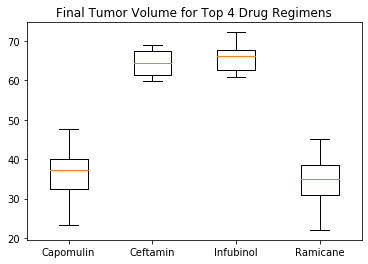

In [53]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1,ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume for Top 4 Drug Regimens")
ax1.set_label("Final Tumor Vol (mm3)")

box_data = list([final_vol_cap, final_vol_cef, final_vol_inf, final_vol_ram])
ax1.boxplot(box_data)

ax1.set_xticklabels(top4drugs)

## Line and scatter plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [ ]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen